In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.ticker import MultipleLocator
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams.update({'font.size': 14, 'axes.linewidth': 2, 'xtick.major.width': 1.5, 'xtick.major.size': 4, 'ytick.major.width': 1.5, 'ytick.major.size': 4})
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
go_file = "../data/enrichment/go/go_enrichment.csv"

In [3]:
def creat_dot_plot(go_file, terms_col="Description", gene_ratio_col="GeneRatio", gene_counts_col="Count", gene_pval_col="qvalue", ontology="BP", ncat=20, figsize=(6,7)):
    # read and parse go file
    go_df = pd.read_csv(go_file)
    go_df["gr_float"] = go_df[gene_ratio_col].str.split("/").apply(lambda x: int(x[0])/int(x[1]))
    # only keep required values for plot
    if ontology:
        plot_df = go_df.loc[go_df.ONTOLOGY==ontology]
    else:
        plot_df = go_df
    plot_df = plot_df.sort_values("gr_float", ascending=False).head(ncat)
    fig, axes = plt.subplots(figsize=figsize)
    norm = plt.Normalize(0, 0.05) # plot_df['qvalue'].min(), plot_df['qvalue'].max()
    sns_ax = sns.scatterplot(
        data=plot_df, x="gr_float", y=terms_col, 
        size=gene_counts_col, hue=gene_pval_col, ax=axes, sizes=(100, 300), palette='RdBu', hue_norm=norm,
        )
    sns_ax.legend(loc='center left', bbox_to_anchor=(1.5, 0.5), ncol=1)
    sns_ax.set_xlabel("Gene ratio")
    sns_ax.set_ylabel("")
    # Add a colorbar
    sm = plt.cm.ScalarMappable(cmap="RdBu", norm=norm)
    sm.set_array([])
    sns_ax.figure.colorbar(sm, shrink=0.25, aspect=5, ticks=[0, 0.01, 0.05])
    return fig

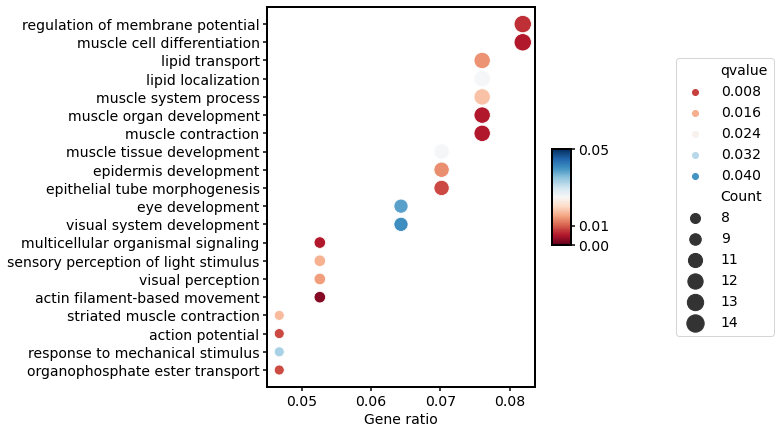

In [4]:
go_bp_fig = creat_dot_plot(go_file, ontology="BP")

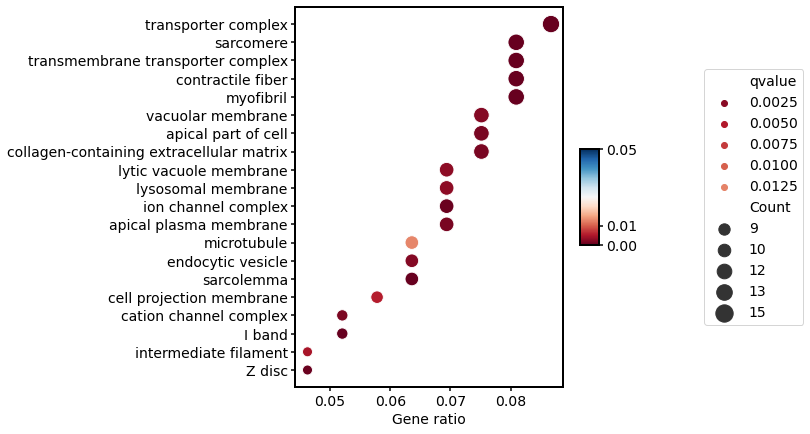

In [5]:
go_cc_fig = creat_dot_plot(go_file, ontology="CC")

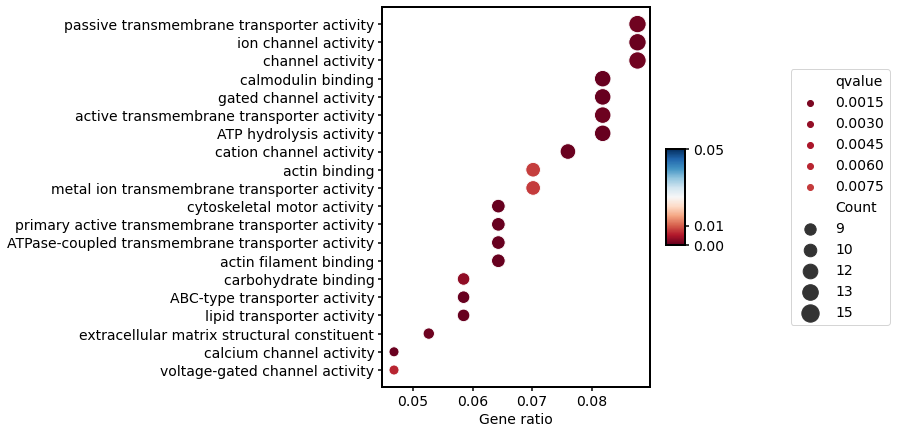

In [6]:
go_cc_fig = creat_dot_plot(go_file, ontology="MF")